In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
startups_data=pd.read_csv('50_Startups.csv')

In [3]:
startups_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
startups_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [5]:
startups_data.shape

(50, 5)

In [6]:
startups_data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
startups_data.mean()

R&D Spend           73721.6156
Administration     121344.6396
Marketing Spend    211025.0978
Profit             112012.6392
dtype: float64

# data processing

In [8]:
del startups_data['State']

In [9]:
x=startups_data.iloc[:,0:3]
y=startups_data['Profit']

In [10]:
startups_data=startups_data.rename({'R&D Spend':'r_d_spend','Marketing Spend':'m_spend'},axis=1)

In [11]:
from sklearn.preprocessing import StandardScaler
st_model=StandardScaler().fit_transform(x)


In [12]:
x=st_model

In [13]:
scaled_model=pd.DataFrame(st_model,columns=('r_d_spend','Administration','m_spend'))
scaled_model['Profit']=y
scaled_model

,r_d_spend,Administration,m_spend,Profit
0,2.016411,0.560753,2.153943,192261.83
1,1.955860,1.082807,1.923600,191792.06
2,1.754364,-0.728257,1.626528,191050.39
3,1.554784,-0.096365,1.422210,182901.99
4,1.504937,-1.079919,1.281528,166187.94
5,1.279800,-0.776239,1.254210,156991.12
6,1.340066,0.932147,-0.688150,156122.51
7,1.245057,0.871980,0.932186,155752.60
8,1.030369,0.986952,0.830887,152211.77
9,1.091819,-0.456640,0.776107,149759.96


In [14]:
scaled_model.corr()

,r_d_spend,Administration,m_spend,Profit
r_d_spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
m_spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# model building

In [15]:
x_scaled=scaled_model.drop(['Profit'],axis=1)
y_scaled=scaled_model.drop(['r_d_spend','Administration','m_spend'],axis=1)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,test_size=0.20,random_state=12)

In [17]:
x_train.shape,x_test.shape

((40, 3), (10, 3))

In [18]:
y_train.shape,y_test.shape

((40, 1), (10, 1))

(<AxesSubplot:xlabel='Administration', ylabel='Density'>,
 <AxesSubplot:xlabel='Administration', ylabel='Density'>)

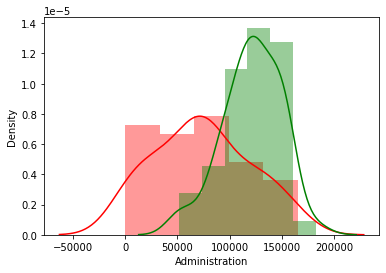

In [19]:
sns.distplot(startups_data['r_d_spend'],color='red'),sns.distplot(startups_data['Administration'],color='green')

(<AxesSubplot:xlabel='Profit', ylabel='Density'>,
 <AxesSubplot:xlabel='Profit', ylabel='Density'>)

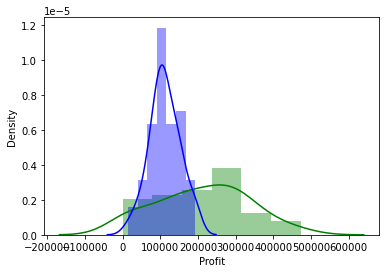

In [20]:
sns.distplot(startups_data['m_spend'],color='green'),sns.distplot(startups_data['Profit'],color='blue')

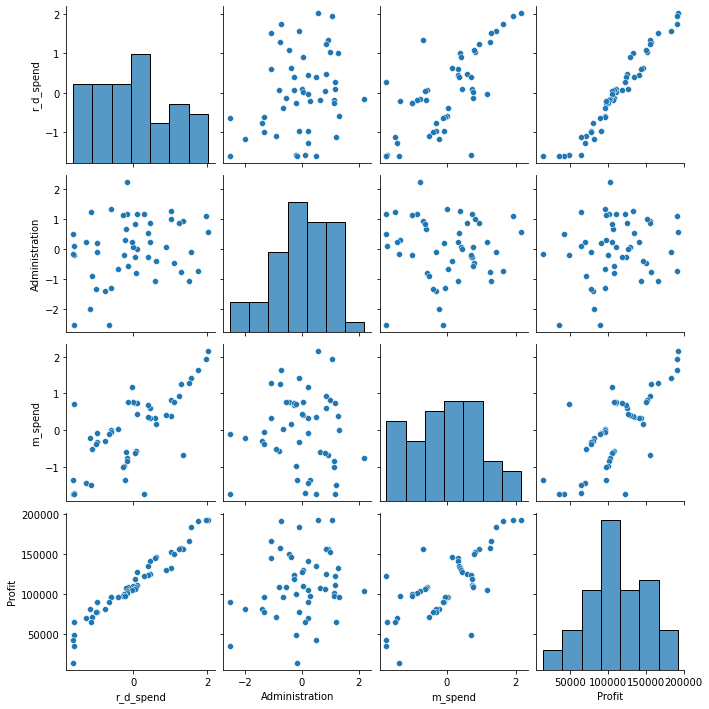

In [21]:
sns.pairplot(data=scaled_model)

# model training

In [22]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_scaled,y_scaled)

LinearRegression()

###  model testing

In [23]:
y_predict_train=linear_model.predict(x_train)

In [24]:
y_predict_test=linear_model.predict(x_test)

In [25]:
#model evaluation

In [26]:
from sklearn.metrics import mean_squared_error,r2_score

In [27]:
print('train:',r2_score(y_train,y_predict_train))
print('test:',r2_score(y_test,y_predict_test))

train: 0.9478685609814204
test: 0.9576817824336327


In [28]:
#model selection

In [29]:
import statsmodels.formula.api as smf

In [30]:
smf.ols('Profit~r_d_spend+Administration+m_spend',data=scaled_model)

In [31]:
methods=(('Profit ~ r_d_spend + Administration + m_spend'),('Profit ~ r_d_spend + Administration'),
     ('Profit ~ r_d_spend  + m_spend'),('Profit ~ Administration +m_spend'),
         ('Profit ~ r_d_spend'),('Profit ~ Administration'),('Profit ~ m_spend'))

In [32]:
for model in methods:
    models=smf.ols(model,data=scaled_model).fit()
    print(model)
    params=models.params
    print(params)
    pvalue=models.pvalues
    pvalue_data=pvalue.to_frame()
    pvalue_data.reset_index(inplace=True)
    pvalue_data.rename({'index':'features'},axis=1)
    print('')
    print('pvalue is:')
    print(pvalue_data)
    for i in range(len(pvalue_data)):
        if i!=0:
            if pvalue_data.iloc[i,1]>0.05:
                print('')
                print('{} is an insignificant feature, since pvalue {} is more than 0.05'
                  .format(pvalue_data.iloc[i,0],pvalue_data.iloc[i,1]))
    print('')
    print('aic value is: ',models.aic)
    print('rsqaure value is: ',models.rsquared)
    print('_____________________________________________________________________________________________________')

Profit ~ r_d_spend + Administration + m_spend
Intercept         112012.639200
r_d_spend          36612.429551
Administration      -743.773321
m_spend             3296.263048
dtype: float64

pvalue is:
            index             0
0       Intercept  2.053195e-52
1       r_d_spend  2.634968e-22
2  Administration  6.017551e-01
3         m_spend  1.047168e-01

Administration is an insignificant feature, since pvalue 0.601755107849745 is more than 0.05

m_spend is an insignificant feature, since pvalue 0.1047168192665835 is more than 0.05

aic value is:  1058.7714985998055
rsqaure value is:  0.9507459940683246
_____________________________________________________________________________________________________
Profit ~ r_d_spend + Administration
Intercept         112012.639200
r_d_spend          39175.430231
Administration     -1469.892410
dtype: float64

pvalue is:
            index             0
0       Intercept  6.180876e-53
1       r_d_spend  2.278348e-31
2  Administration  2.888932

The model with least aic value and higher rsquare value is considered comparatively as a good model


### calculate vif

In [33]:
reg_rd=smf.ols('r_d_spend ~ Administration + m_spend',data=scaled_model).fit().rsquared
vif_rd=1/(1-reg_rd)

reg_ad=smf.ols('Administration ~ r_d_spend + m_spend',data=scaled_model).fit().rsquared
vif_ad=1/(1-reg_ad)

reg_ms=smf.ols('m_spend ~ r_d_spend + Administration ',data=scaled_model).fit().rsquared
vif_ms=1/(1-reg_ms)

In [34]:
vif_table=pd.DataFrame({'feature':[' r_d_spend','Administration','m_spend'],'VIF':[vif_rd,vif_ad,vif_ms]})
vif_table

,feature,VIF
0,r_d_spend,2.468903
1,Administration,1.175091
2,m_spend,2.326773


In [35]:
#residual analysis

In [36]:
#qqplot

In [37]:
modelqq=smf.ols('Profit~r_d_spend+Administration+m_spend',data=scaled_model).fit()

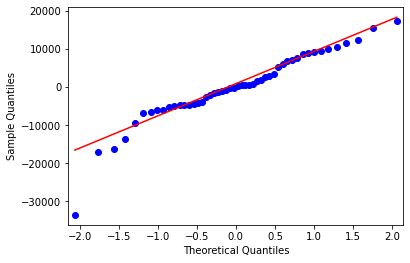

In [38]:
import statsmodels.api as sm
qqplot=sm.qqplot(modelqq.resid,line='q')

In [39]:
#qqplot says the data moderatly normally distribution

In [40]:
list(np.where(modelqq.resid<-15000))

[array([14, 15, 49], dtype=int64)]

In [41]:
## residual for homoscedasticity

In [42]:
scalar=StandardScaler()

In [43]:
fittedqq=pd.DataFrame(modelqq.fittedvalues)

In [44]:
residqq=pd.DataFrame(modelqq.resid)

In [45]:
fittedqq1=scalar.fit_transform(fittedqq)

In [46]:
residqq1=scalar.fit_transform(residqq)

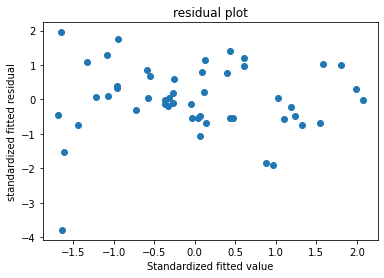

In [47]:
plt.scatter(fittedqq1,residqq1)
plt.title('residual plot')
plt.xlabel('Standardized fitted value')
plt.ylabel('standardized fitted residual')
plt.show()

# residual vs regressors

r_d_spend


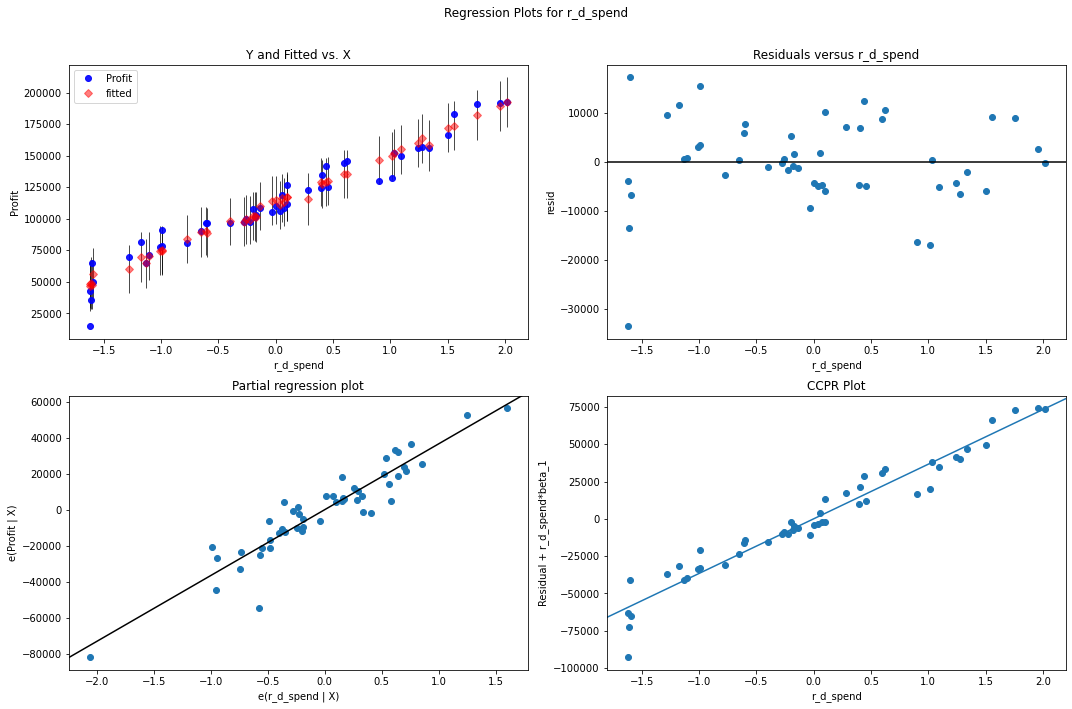

Administration


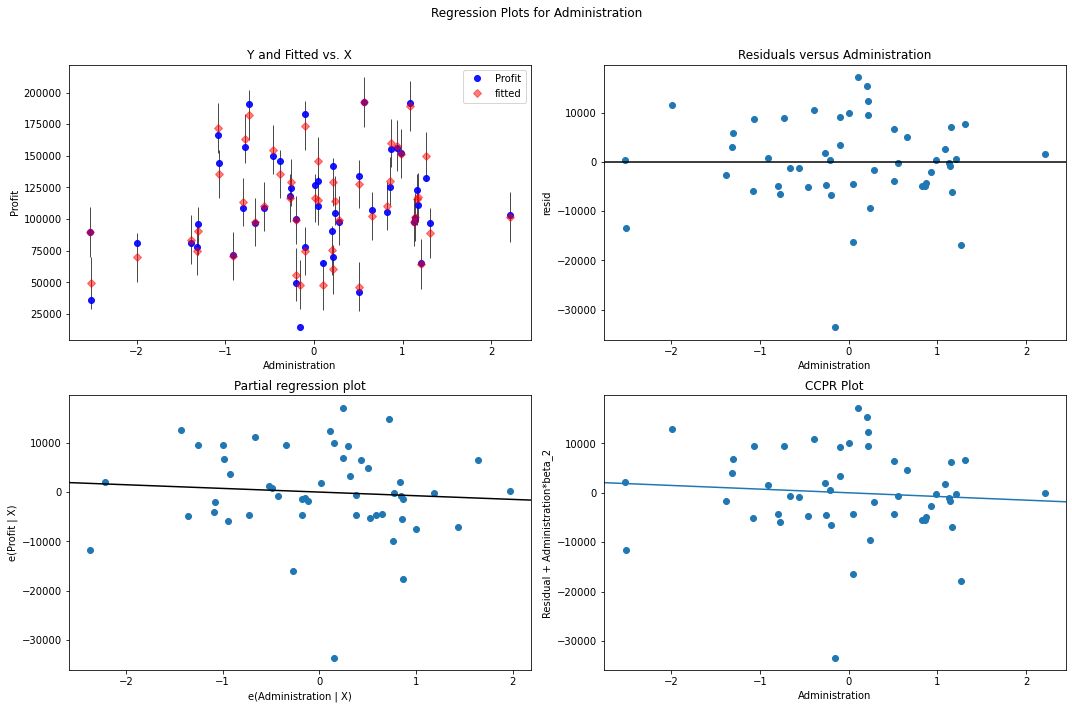

m_spend


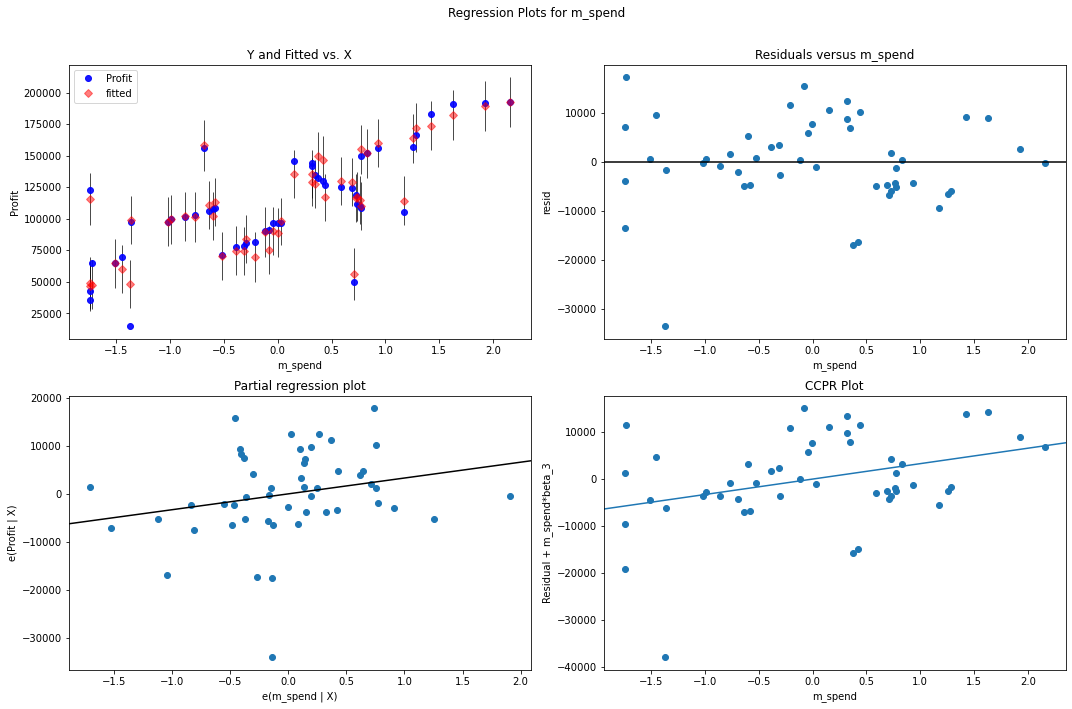

In [48]:
graphics=['r_d_spend','Administration','m_spend']
for i  in graphics:
    print(i)
    fig=plt.figure(figsize=(15,10))
    fig=sm.graphics.plot_regress_exog(modelqq,i,fig=fig)
    plt.show()

In [49]:
model_influence = modelqq.get_influence()
c,d= model_influence.cooks_distance

<StemContainer object of 3 artists>

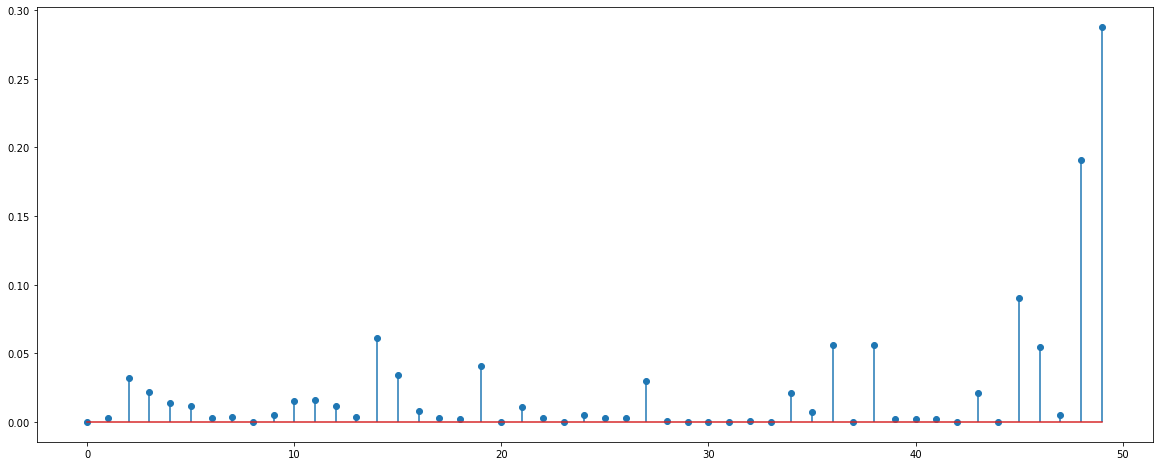

In [50]:
fig_cook=plt.figure(figsize=(20,8))
plt.stem(np.arange(len(startups_data)),np.round(c,3))

In [51]:
from statsmodels.graphics.regressionplots import influence_plot

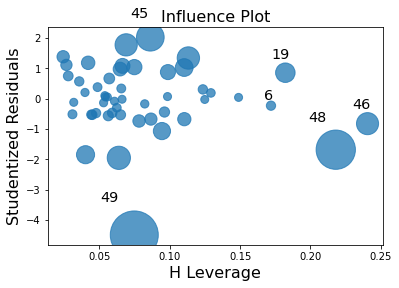

In [52]:
influence_plot(modelqq)
plt.show()

In [53]:
startups_data_new=startups_data
startups_data_new

,r_d_spend,Administration,m_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [54]:
#here in our data 49th index find has an outlier so we remove that data

In [55]:
scaled_model.drop(index=[49],axis=0,inplace=True)

In [56]:
scaled_model

,r_d_spend,Administration,m_spend,Profit
0,2.016411,0.560753,2.153943,192261.83
1,1.955860,1.082807,1.923600,191792.06
2,1.754364,-0.728257,1.626528,191050.39
3,1.554784,-0.096365,1.422210,182901.99
4,1.504937,-1.079919,1.281528,166187.94
5,1.279800,-0.776239,1.254210,156991.12
6,1.340066,0.932147,-0.688150,156122.51
7,1.245057,0.871980,0.932186,155752.60
8,1.030369,0.986952,0.830887,152211.77
9,1.091819,-0.456640,0.776107,149759.96


# final mode

In [57]:
selected_model=smf.ols('Profit ~ r_d_spend  + m_spend',data=scaled_model).fit()

In [58]:
selected_model.rsquared,selected_model.aic

(0.9610856807456628, 1018.8564801588341)

here our model remove outlier and then the rsquared value and aic value is increased
so,this method is more suitable for our work

# END